Get the Essential Libraries and the Data

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (14, 11)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A look at the Class Imbalance in the data

In [ ]:
neg, pos = np.bincount(raw_df['Class'])
total = pos + neg
print("Examples\n  Total: {}\n  Positive Cases: {}({:.2f}% of total)".format(total, pos, 100*pos/total))

Examples
  Total: 284807
  Positive Cases: 492(0.17% of total)


The data has non-useful column time that has to be dropped. Also, column **Amount** has a range very different from rest of the columns ( already scaled). 

In [ ]:
clean_df = raw_df.copy()
clean_df = clean_df.drop(['Time'], axis=1)

eps = 0.01
clean_df['Log Amount'] = np.log(clean_df['Amount']+eps)
clean_df = clean_df.drop(['Amount'], axis=1)

In [ ]:
clean_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,2.960364
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.950786
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-4.605170
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,1.724551
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,3.091497
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,4.346076
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,10.153903


Data Split into Tran, Val and Test

In [ ]:
train_df, test_df = train_test_split(clean_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [ ]:
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

In [ ]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_features

array([[ 2.02925054e+00, -1.20477594e+00,  3.92817371e-01, ...,
         2.35302968e-02, -2.67637481e-02,  3.38439026e+00],
       [ 1.08927336e+00, -9.65534108e-01,  2.97149484e-01, ...,
         6.42073620e-02,  5.34276111e-04,  4.07601086e+00],
       [-4.38822063e-01,  1.23990278e+00,  9.60798821e-02, ...,
         4.65839991e-01,  2.32949975e-01,  2.07065304e+00],
       ...,
       [ 2.07157047e+00,  8.25167405e-02, -1.21669380e+00, ...,
        -7.20031925e-03, -5.45844256e-02,  9.95033085e-03],
       [-1.87480119e+00,  1.71636678e+00,  1.16639379e+00, ...,
         2.44267128e-01,  1.43911590e-01,  3.36472237e-01],
       [ 1.62949354e+00, -1.31818950e+00, -2.80483452e+00, ...,
        -1.84393688e-01, -4.00944860e-02,  5.75355628e+00]])

Standard Scaling of all three feature sets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)

val_features = sc.transform(val_features)
test_features = sc.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


## Data Visualization

We made an array that has elements with boolean result whether a train feature has class negative or positive. We shall use it to form datasets with all positive and all negative samples and compare the two for different inter-feature relations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


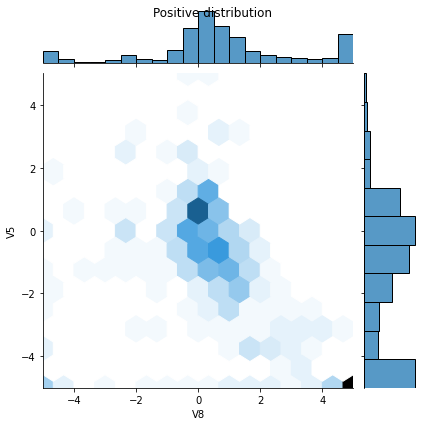

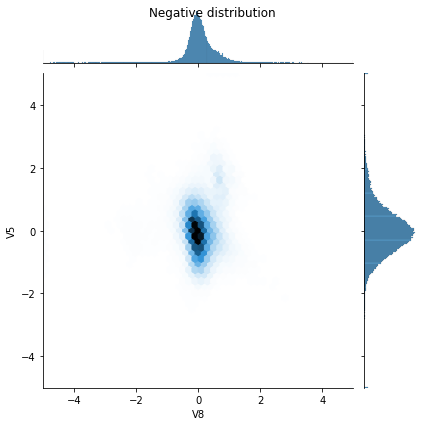

In [ ]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['V8'], pos_df['V5'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V8'], neg_df['V5'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution") 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


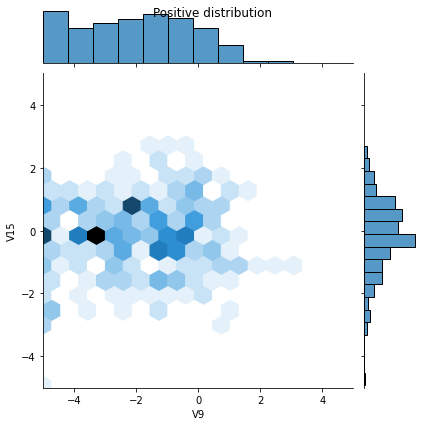

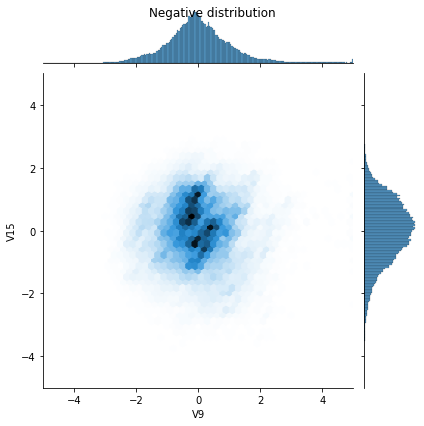

In [ ]:
sns.jointplot(pos_df['V9'], pos_df['V15'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V9'], neg_df['V15'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution") 

Most of the distributions show that values lie mostly in range(-2,2) for negative caese (non-fraud) and it is the fraud cases where we observe more extreme values.

This gives us enough reason to beleive that no further data preparation is necessary for decent classification results as distribution is detectable for fraud and normal transactions.

## Model

Evaluation metrics list

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

We can prepare a function that makes the model for us. Here we will keep output layer bias a random initialization and see what loss we get. We will apply two dense layers and a droput with 0.5 probab alon with a sigmoid output layer.

In [ ]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(
          10, activation='relu',),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

For faster training we can apply early stopping

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', verbose=1, patience=10, mode='max', restore_best_weights=True
    )

In [ ]:
model = make_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                480       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.predict(train_features[:10])

array([[0.7374573 ],
       [0.69131744],
       [0.810483  ],
       [0.6182493 ],
       [0.73512965],
       [0.69775105],
       [0.7910852 ],
       [0.7161198 ],
       [0.40893695],
       [0.7707201 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.3802


This was the loss with random bias initialization of the output layer bias. We can achieve better initial guesses and hence faster results with lower loss if we initialize the output layer biases with keeping the class imbalance in mind. 

In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


array([[0.00156683],
       [0.00096482],
       [0.00291094],
       [0.00368962],
       [0.00086206],
       [0.00309095],
       [0.00298724],
       [0.00242463],
       [0.00014725],
       [0.00786507]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0142


This was a great improvement from random case. 

Now it's better if we save these initial weights for training.

In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

### Check the impact of bias correction

Without bias correction

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,train_labels,batch_size=BATCH_SIZE, epochs=20, validation_data=(val_features, val_labels), verbose=0
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


With bias correction

In [ ]:
model = make_model()
model.load_weights(initial_weights)
corrected_bias_history = model.fit(
    train_features, train_labels,batch_size=BATCH_SIZE,epochs=20,validation_data=(val_features, val_labels), verbose=0
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


We have collected losses on train and validation sets. The difference between random_output_bias and corrected_output_bias can be observed below.

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

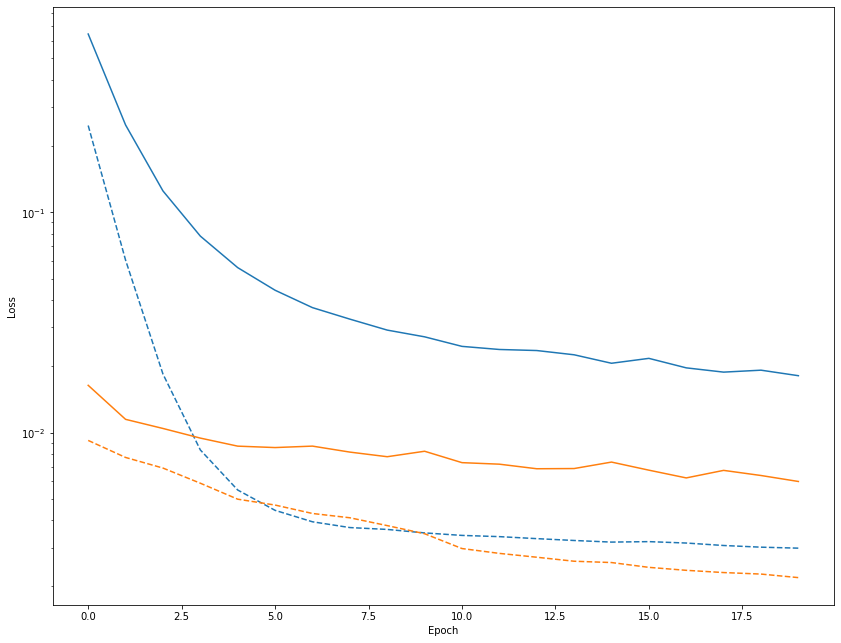

In [ ]:
plot_loss(zero_bias_history, "Zero_Bias", 0)
plot_loss(corrected_bias_history, "Corrected_Bias", 1)

## Model Training

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping], validation_data=(val_features, val_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
90/90 [==============================] - 4s 22ms/step - loss: 0.0164 - tp: 66.0000 - fp: 153.0000 - tn: 227303.0000 - fn: 323.0000 - accuracy: 0.9979 - precision: 0.3014 - recall: 0.1697 - auc: 0.6625 - prc: 0.0844 - val_loss: 0.0090 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7834 - val_prc: 0.3948
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 0.0112 - tp: 50.0000 - fp: 23.0000 - tn: 181931.0000 - fn: 272.0000 - accuracy: 0.9984 - precision: 0.6849 - recall: 0.1553 - auc: 0.6943 - prc: 0.1772 - val_loss: 0.0078 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9028 - val_prc: 0.6196
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 0.0105 - tp: 60.0000 - fp: 16.0000 - tn: 181938.0

We have a trained DL model now that we shall evaluate now on our metric list.

In [ ]:
def plot_metrics(history):
  metric = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metric):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2, 2, n+1)
    plt.plot(history.epoch, history.history[metric], color= colors[0], label = 'Train')
    plt.plot(history.epoch, history.history['val_'+metric], color= colors[0],linestyle="--", label = 'Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

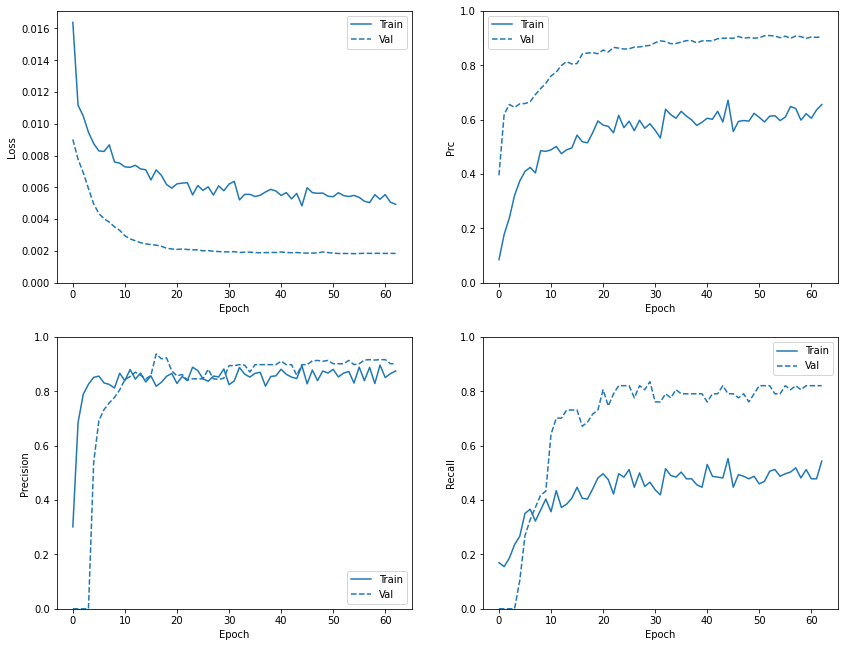

In [ ]:
plot_metrics(baseline_history)

Predictions of this model on Train and Test Data

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

Confision Matrix

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Evaluation on test data

loss :  0.002815601183101535
tp :  77.0
fp :  9.0
tn :  56850.0
fn :  26.0
accuracy :  0.9993855357170105
precision :  0.895348846912384
recall :  0.7475728392601013
auc :  0.9415438175201416
prc :  0.8434450030326843

Legitimate Transactions Detected (True Negatives):  56850
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  77
Total Fraudulent Transactions:  103


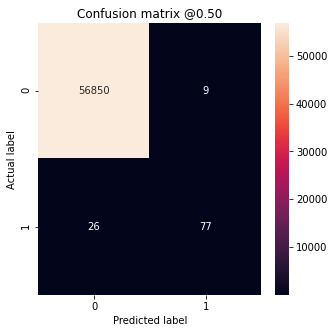

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

ROC curve

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

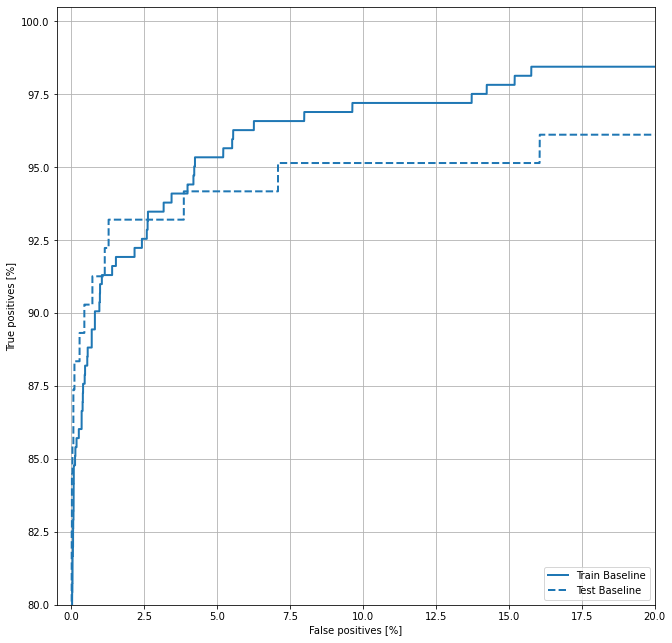

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
def plot_prc(name, labels, predictions, **kwargs):
  precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)
  plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

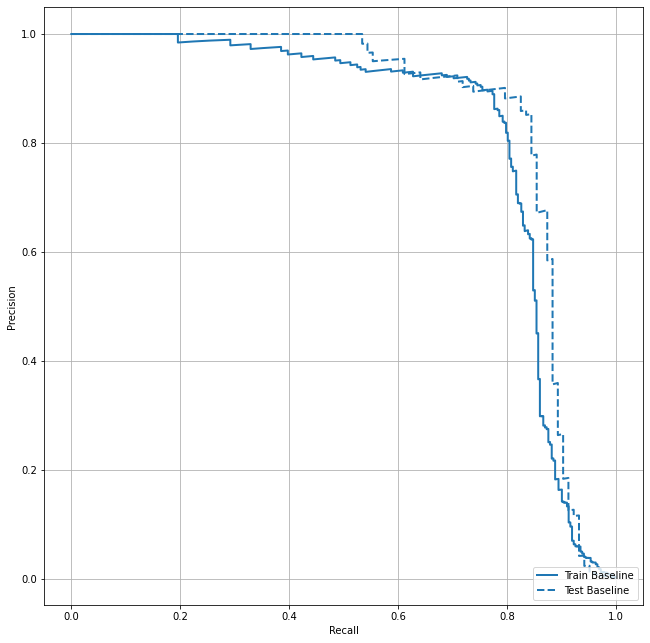

In [ ]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

Precision looks good enough but ROC i sn't as high as we'd like it to be.

We can see that naturally many true negatives(majority normal transactions were identified correctly) were identified. There also are a few false Positives( normal cases flagged as fraud). But the most important thing is that out of 103 fraud cases only 81 were correctly identified. 22 of fraud cases were false negative, that can be a big issue since it is almost 20% of total fraud cases.

What we need here is to somehow reduce the number of False Negatives.

## Approach 1: Class Weight

Make the model pay more attention to important under represented class with higher loss weightage on false negatives.

In [ ]:
weight_for_1 = (1/pos) * (total/2.0)
weight_for_0 = (1/neg) * (total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


Re-training and evaluation with class weights

In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=None, validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
90/90 [==============================] - 4s 21ms/step - loss: 2.6018 - tp: 118.0000 - fp: 1089.0000 - tn: 237724.0000 - fn: 307.0000 - accuracy: 0.9942 - precision: 0.0978 - recall: 0.2776 - auc: 0.6956 - prc: 0.0671 - val_loss: 0.0094 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 45498.0000 - val_fn: 63.0000 - val_accuracy: 0.9985 - val_precision: 0.5000 - val_recall: 0.0597 - val_auc: 0.9472 - val_prc: 0.2384
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 1.5628 - tp: 124.0000 - fp: 3690.0000 - tn: 178264.0000 - fn: 198.0000 - accuracy: 0.9787 - precision: 0.0325 - recall: 0.3851 - auc: 0.7203 - prc: 0.0542 - val_loss: 0.0140 - val_tp: 44.0000 - val_fp: 49.0000 - val_tn: 45453.0000 - val_fn: 23.0000 - val_accuracy: 0.9984 - val_precision: 0.4731 - val_recall: 0.6567 - val_auc: 0.9682 - val_prc: 0.4660
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 1.3392 - tp: 153.0000 - fp: 7220.0000 - tn: 174734.0000 - fn: 169.0000 - a

evaluation

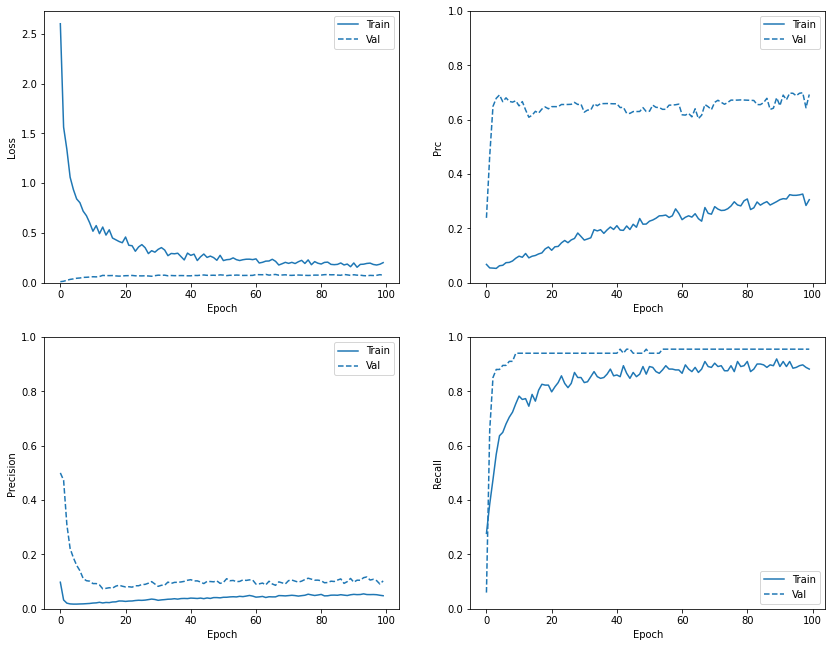

In [ ]:
plot_metrics(weighted_history)

model predictions on train and test sets

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.07177797704935074
tp :  96.0
fp :  654.0
tn :  56205.0
fn :  7.0
accuracy :  0.9883957505226135
precision :  0.12800000607967377
recall :  0.9320388436317444
auc :  0.9840256571769714
prc :  0.6904887557029724

Legitimate Transactions Detected (True Negatives):  56295
Legitimate Transactions Incorrectly Detected (False Positives):  564
Fraudulent Transactions Missed (False Negatives):  8
Fraudulent Transactions Detected (True Positives):  95
Total Fraudulent Transactions:  103


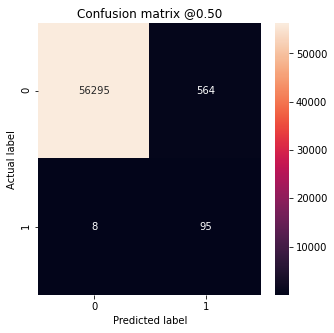

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

We can see that with Class weights, now we have a higher number of false positives, lower accuracy and precison. But we also got a better recall and AUC because now model is more capable of identifying a fraudulent case. This comes up with more false positives and that is a tradeoff here.

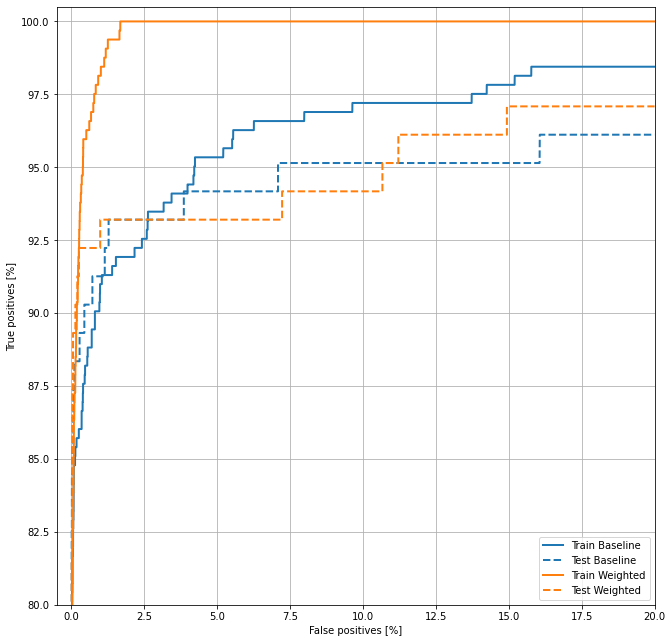

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

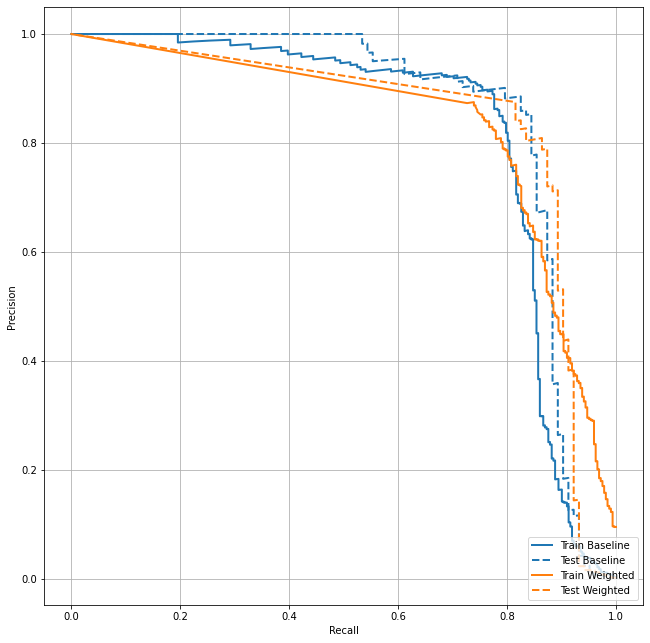

In [ ]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

# Approach 2: OverSampling

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181954, 29)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363908, 29)

oversampling using tf

In [ ]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.4912109375


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

training and evaluation on oversampled data

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
278/278 [==============================] - 23s 76ms/step - loss: 0.5049 - tp: 256106.0000 - fp: 99772.0000 - tn: 347745.0000 - fn: 133627.0000 - accuracy: 0.7212 - precision: 0.7196 - recall: 0.6571 - auc: 0.8096 - prc: 0.8264 - val_loss: 0.1919 - val_tp: 64.0000 - val_fp: 625.0000 - val_tn: 44877.0000 - val_fn: 3.0000 - val_accuracy: 0.9862 - val_precision: 0.0929 - val_recall: 0.9552 - val_auc: 0.9848 - val_prc: 0.7414
Epoch 2/100
278/278 [==============================] - 20s 71ms/step - loss: 0.2464 - tp: 228315.0000 - fp: 11044.0000 - tn: 273716.0000 - fn: 56269.0000 - accuracy: 0.8818 - precision: 0.9539 - recall: 0.8023 - auc: 0.9617 - prc: 0.9674 - val_loss: 0.0863 - val_tp: 64.0000 - val_fp: 720.0000 - val_tn: 44782.0000 - val_fn: 3.0000 - val_accuracy: 0.9841 - val_precision: 0.0816 - val_recall: 0.9552 - val_auc: 0.9827 - val_prc: 0.7398
Epoch 3/100
278/278 [==============================] - 20s 71ms/step - loss: 0.1883 - tp: 238683.0000 - fp: 8632.0000 - tn: 276

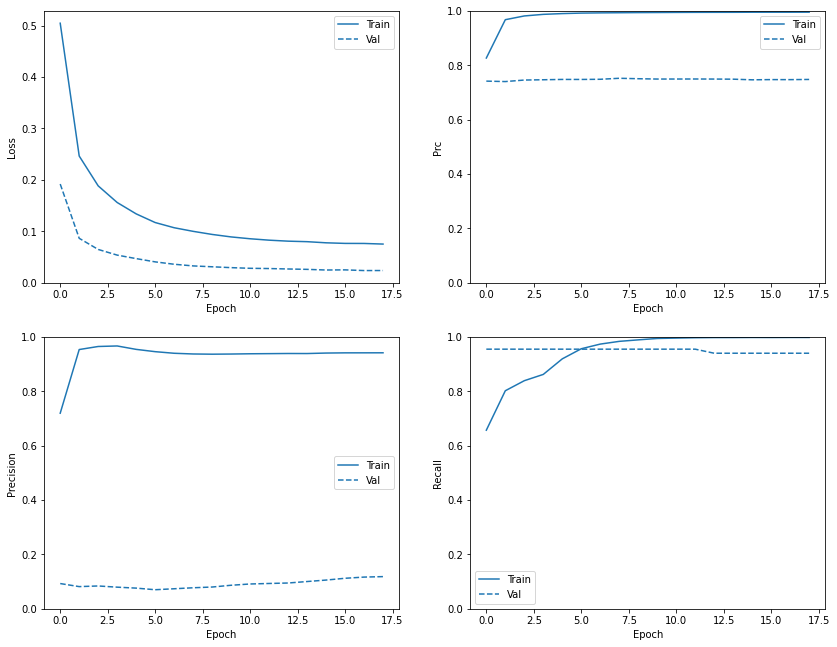

In [ ]:
plot_metrics(resampled_history)

check for overfit


retraining with a different steps per epoch value

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=None,
    validation_data=(val_ds))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1000
20/20 [==============================] - 5s 139ms/step - loss: 0.9724 - tp: 9878.0000 - fp: 11001.0000 - tn: 66279.0000 - fn: 10764.0000 - accuracy: 0.7777 - precision: 0.4731 - recall: 0.4785 - auc: 0.7482 - prc: 0.5262 - val_loss: 0.8214 - val_tp: 58.0000 - val_fp: 31295.0000 - val_tn: 14207.0000 - val_fn: 9.0000 - val_accuracy: 0.3130 - val_precision: 0.0018 - val_recall: 0.8657 - val_auc: 0.7515 - val_prc: 0.0228
Epoch 2/1000
20/20 [==============================] - 2s 82ms/step - loss: 0.7687 - tp: 11662.0000 - fp: 9158.0000 - tn: 11351.0000 - fn: 8789.0000 - accuracy: 0.5618 - precision: 0.5601 - recall: 0.5702 - auc: 0.6058 - prc: 0.6836 - val_loss: 0.7454 - val_tp: 65.0000 - val_fp: 25779.0000 - val_tn: 19723.0000 - val_fn: 2.0000 - val_accuracy: 0.4342 - val_precision: 0.0025 - val_recall: 0.9701 - val_auc: 0.9208 - val_prc: 0.1597
Epoch 3/1000
20/20 [==============================] - 2s 87ms/step - loss: 0.6645 - tp: 12711.0000 - fp: 7858.0000 - tn: 12653.0000 - 

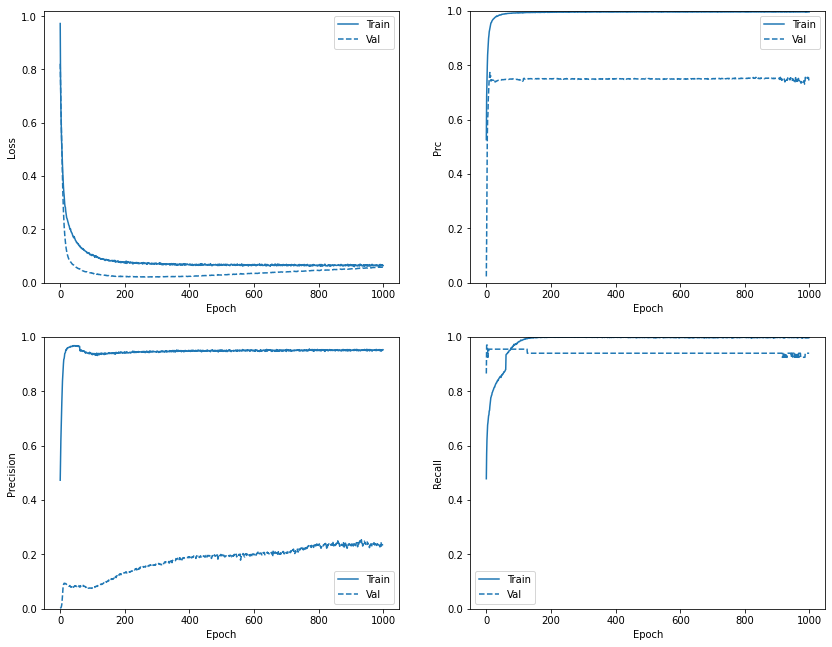

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.06241406127810478
tp :  93.0
fp :  267.0
tn :  56592.0
fn :  10.0
accuracy :  0.995137095451355
precision :  0.25833332538604736
recall :  0.9029126167297363
auc :  0.9509984850883484
prc :  0.760431170463562

Legitimate Transactions Detected (True Negatives):  56592
Legitimate Transactions Incorrectly Detected (False Positives):  267
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  93
Total Fraudulent Transactions:  103


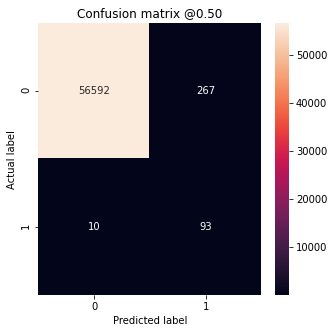

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

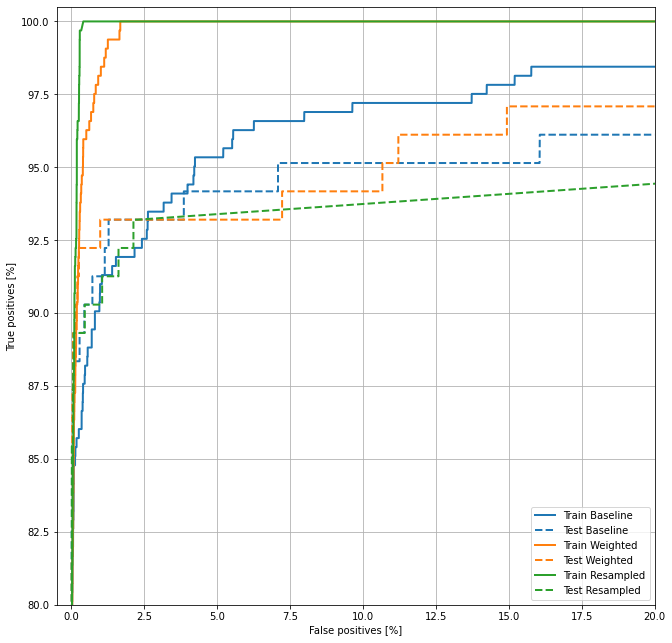

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

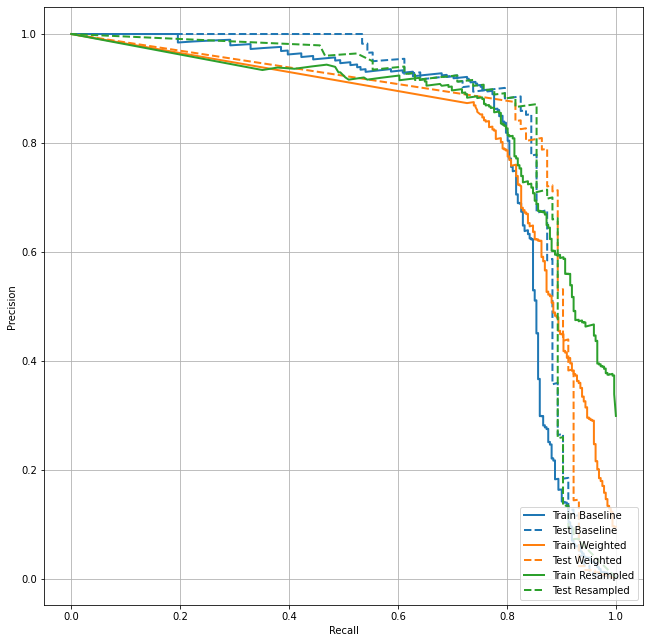

In [ ]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# Final Words

The selection of any approach for this kind of classification task is very much dependent on the use case. For many of the situations, like the credit card fraud, have a high cost for false negatives (when a fraud case is unidentified) while having a false poitive might mean a slight inconvenience to the customer. 


But overall we can say that using any of the two approaches we are very effectively able to minimise the number of false positives and hence model is effective in its execution.